In [1]:
% matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import seaborn

seaborn.set()

In [2]:
import matplotlib

matplotlib.__version__

'3.5.2'

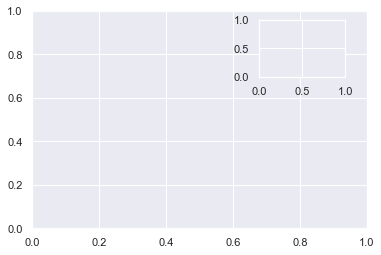

In [3]:
ax1 = plt.axes()  # 默认坐标轴
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

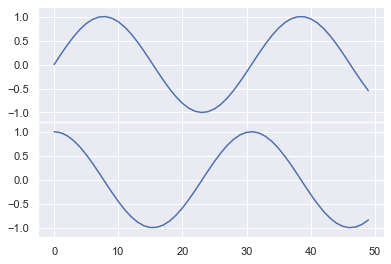

In [16]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))
x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

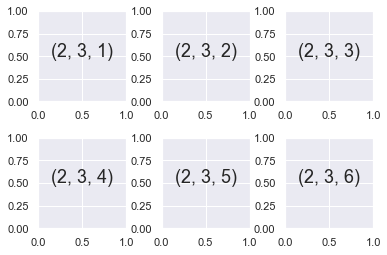

In [17]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.subplots_adjust(hspace=0.4, wspace=0.4)
    plt.text(0.5, 0.5, str((2, 3, i)), fontsize=18, ha='center')

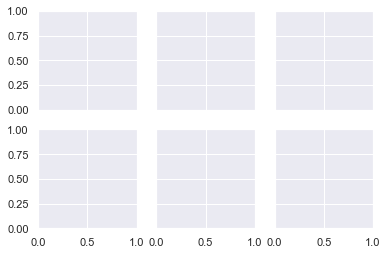

In [18]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

In [ ]:
#坐标轴存放在一个NumPy数组中,按照[row, col]取值
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')

fig

In [20]:
grid = plt.GridSpec(3, 3, wspace=0.4, hspace=0.3)

<AxesSubplot:>

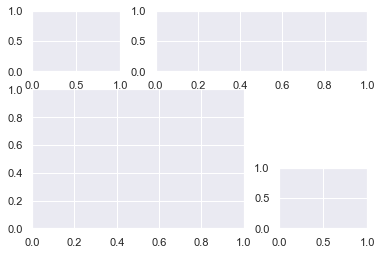

In [21]:
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1:3, 0:2])
plt.subplot(grid[2, 2])

In [39]:
# 创建一些正态分布数据
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# 设置坐标轴和网格配置方式
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(6, 6, hspace=0.4, wspace=0.4)
main_ax = fig.add_subplot(grid[:-2, 2:])
y_hist = fig.add_subplot(grid[:-2, :2], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-2:, 2:], yticklabels=[], sharex=main_ax)
# 主坐标轴画散点图
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)
# 次坐标轴画频次直方图
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()
y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

<IPython.core.display.Javascript object>

In [23]:
lst1 = 20


def func(lst):
    print(lst)
    lst = 1
    print(lst)


func(lst1)
print(lst1)

20
1
20


In [24]:
def sorted_list(target: list, method: int) -> list:
    """
    sorted a list
    :param target: the list
    :param method: 1 is in ascending order, 0 is in descending order
    :return: sorted list
    """
    for i in range(len(target)):
        for j in range(i + 1, len(target)):
            if method:
                if target[i] < target[j]:
                    target[i], target[j] = target[j], target[i]
            else:
                if target[i] > target[j]:
                    target[i], target[j] = target[j], target[i]
    return target


list01 = [3, 9, 0, 7, 15, 6]
sorted_list(list01, 0)


[0, 3, 6, 7, 9, 15]

In [45]:
%matplotlib notebook

In [48]:
%matplotlib inline

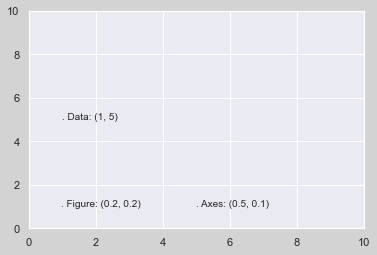

In [41]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])
# 虽然transform=ax.transData是默认值，但还是设置一下
ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure);

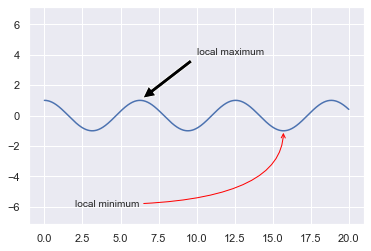

In [43]:
fig, ax = plt.subplots()
x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')
ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->", color='red',
                            connectionstyle="angle3,angleA=0,angleB=-90"));

(-1.0, 1.0)

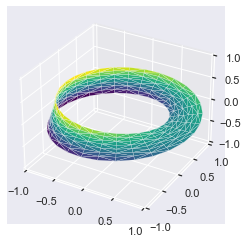

In [49]:
# 案例：莫比乌斯带
theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.25, 0.25, 8)
w, theta = np.meshgrid(w, theta)
phi = 0.5 * theta
# x - y平面内的半径
r = 1 + w * np.cos(phi)
x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))
# 用基本参数化方法定义三角剖分
from matplotlib.tri import Triangulation

tri = Triangulation(np.ravel(w), np.ravel(theta))
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles,
                cmap='viridis', linewidths=0.2)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)